In [2]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde

# Set parameters
alpha = 510
length = 50
time = 0.1
nodes = 50
initial_temp = 20
boundary_temp = 100

# Define the PDE (Heat equation)
def heat_equation(x, u):
    du_t = dde.grad.jacobian(u, x, i=0, j=1)
    du_xx = dde.grad.hessian(u, x, i=0, j=0)
    return du_t - alpha * du_xx

# Initial condition
def initial_cond(x):
    return initial_temp

# Boundary condition
def boundary_cond(x, on_boundary):
    return on_boundary

# Domain
geom = dde.geometry.Interval(0, length)
timedomain = dde.geometry.TimeDomain(0, time)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Initial and boundary conditions
ic = dde.IC(geomtime, initial_cond, lambda _, on_initial: on_initial)
bc = dde.DirichletBC(geomtime, lambda x: boundary_temp, boundary_cond)

# Data
data = dde.data.TimePDE(
    geomtime, heat_equation, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160
)

# Neural network
net = dde.maps.FNN([2] + [50] * 3 + [1], "tanh", "Glorot uniform")

# Model
model = dde.Model(data, net)

# Print model summary
model.compile("adam", lr=0.001)

# Training
losshistory, train_state = model.train(epochs=5000)

# Define test points
num_test_points = 1000
x_test = np.linspace(0, length, nodes + 1)
t_test = np.linspace(0, time, num_test_points)
X_test, T_test = np.meshgrid(x_test, t_test)
X_test = np.vstack((X_test.ravel(), T_test.ravel())).T

# Predict at test points
u_test_pred = model.predict(X_test)

# Reshape predictions for plotting
u_test_pred_plot = u_test_pred.reshape((num_test_points, nodes + 1))

# Plotting


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term
Compiling model...
Building feed-forward neural network...


c:\Users\Shashidhar bhat n\AppData\Local\Programs\Python\Python311\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(



'build' took 0.400210 s


'compile' took 1.102875 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.78e+02, 1.00e+04, 4.12e+02]    [1.78e+02, 1.00e+04, 4.12e+02]    []  
1000      [3.54e+01, 2.64e+03, 7.17e+02]    [3.54e+01, 2.64e+03, 7.17e+02]    []  
2000      [4.53e+01, 8.49e+02, 5.44e+02]    [4.53e+01, 8.49e+02, 5.44e+02]    []  
3000      [3.66e+01, 3.63e+02, 6.38e+02]    [3.66e+01, 3.63e+02, 6.38e+02]    []  
4000      [2.89e+02, 5.86e+02, 5.07e+02]    [2.89e+02, 5.86e+02, 5.07e+02]    []  
5000      [1.11e+02, 2.49e+02, 4.40e+02]    [1.11e+02, 2.49e+02, 4.40e+02]    []  

Best model at step 5000:
  train loss: 8.00e+02
  test loss: 8.00e+02
  test metric: []

'train' took 90.468464 s



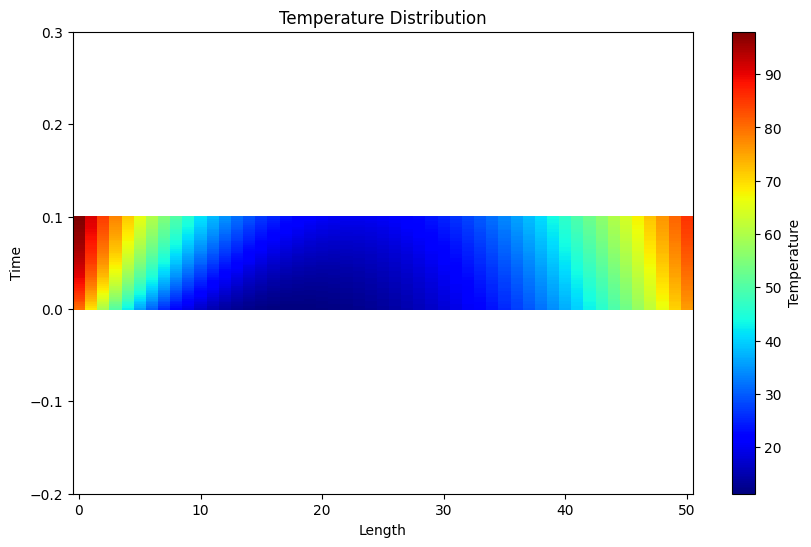

In [3]:
# Generate test points with correct dimensions
x_test = np.linspace(0, length, nodes + 1)
t_test = np.linspace(0, time, nodes + 1)  # Adjusted number of test points
X_test, T_test = np.meshgrid(x_test, t_test)
X_test = X_test.flatten()
T_test = T_test.flatten()

# Predict at test points
u_test_pred = model.predict(np.vstack((X_test, T_test)).T)

# Reshape predictions for plotting
u_test_pred_plot = u_test_pred.reshape((nodes + 1, nodes + 1))

# Plotting
plt.figure(figsize=(10, 6))
pcm = plt.pcolormesh(X_test.reshape((nodes + 1, nodes + 1)), T_test.reshape((nodes + 1, nodes + 1)), u_test_pred_plot, cmap='jet')
plt.colorbar(pcm, label='Temperature')
plt.title('Temperature Distribution')
plt.xlabel('Length')
plt.ylabel('Time')
plt.ylim(-2*.1, 3*.1)
plt.show()



In [4]:
mae = np.mean(np.abs(u_test_pred))
mse = np.mean((u_test_pred) ** 2)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Mean Absolute Error: 37.6410
Mean Squared Error: 1902.4368
